In [7]:
# import numpy as np
from skimage import io, color, filters, measure, exposure, feature
from shapely.geometry import MultiPoint, Polygon
import shapely
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.collections import PatchCollection
import numpy as np


def measure_curv(name, thresh_coeff=0.8, path='organoid_images'):


    # Step 2: Load and preprocess the image
    image = io.imread(path+"/"+ name)
    rgb_image = color.rgba2rgb(image)
    grayscale_image = color.rgb2gray(rgb_image)
    blurred_image = filters.gaussian(grayscale_image, sigma=10)
    threshold_value = thresh_coeff*filters.threshold_otsu(blurred_image)
    binary_image = grayscale_image > threshold_value


    # Step 3: Apply edge detection (optional)
    edges = feature.canny(binary_image)

    # Step 4: Find contours
    contours = measure.find_contours(edges, level=0.5)

    # Plot the original image
    fig, ax = plt.subplots()
    ax.imshow(rgb_image)

    # Plot contours over the original image
    #for contour in contours:
    #    ax.plot(contour[:, 1], contour[:, 0], linewidth=2, color='red')

    #largest_contour = max(contours, key=lambda x: len(x))
    #ax.plot(largest_contour[:, 1], largest_contour[:, 0], linewidth=2, color='yellow')

    # Concatenate all contours into a single array
    points = np.concatenate(contours)

    # Step 5: Compute concave hull
    multi_point = MultiPoint(points)
    hull = shapely.concave_hull(multi_point, ratio=0.05)


    # Plot the concave hull as a polygon
    ys, xs = hull.exterior.xy
    circularity = 4*np.pi*hull.area/(hull.length**2)
    ax.plot(xs, ys, linewidth=2, color='green')

    plt.show()
    
    plt.clf()
    print(circularity)
    return circularity


2


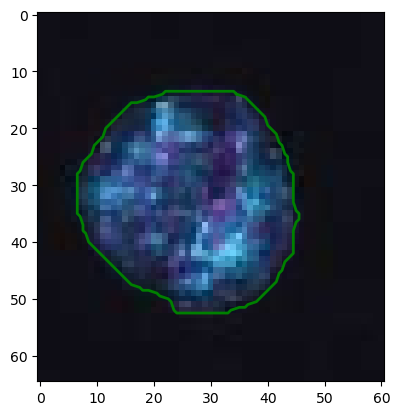

0.9220477562786381
3


<Figure size 640x480 with 0 Axes>

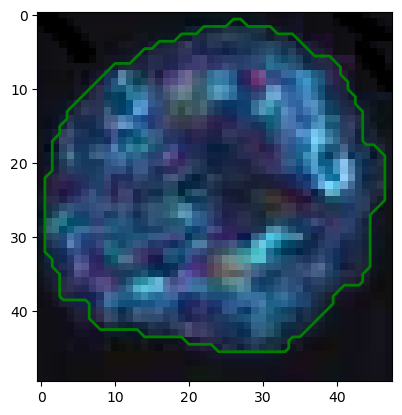

0.827168749010559
4


<Figure size 640x480 with 0 Axes>

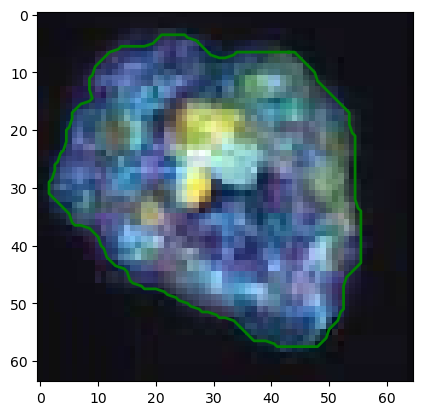

0.8179476540552953
6


<Figure size 640x480 with 0 Axes>

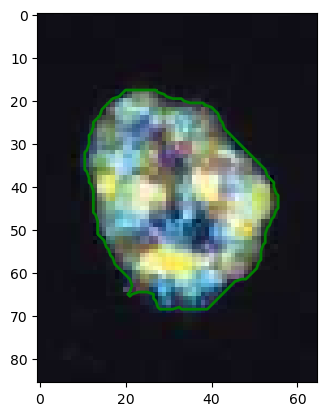

0.8298005255009139
7


<Figure size 640x480 with 0 Axes>

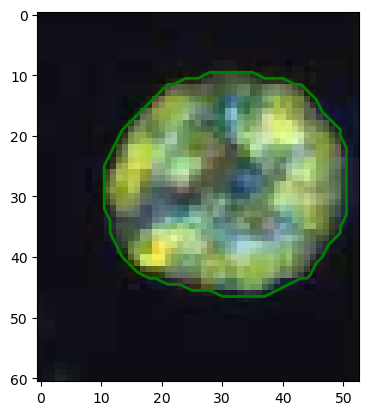

0.9492769611019651
9


<Figure size 640x480 with 0 Axes>

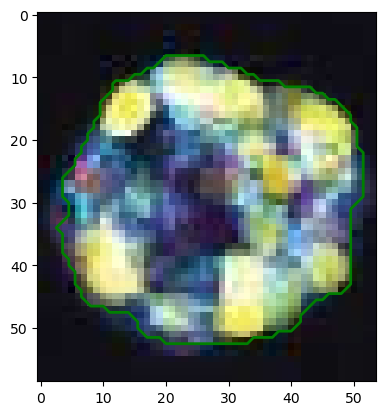

0.819045706453433
10


<Figure size 640x480 with 0 Axes>

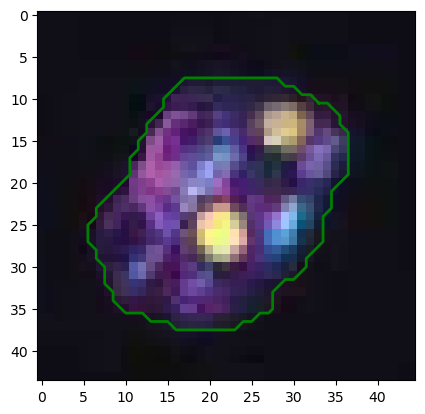

0.8145657521130606
12


<Figure size 640x480 with 0 Axes>

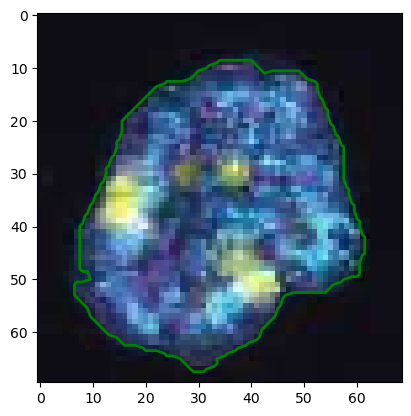

0.7894875417185993
0


<Figure size 640x480 with 0 Axes>

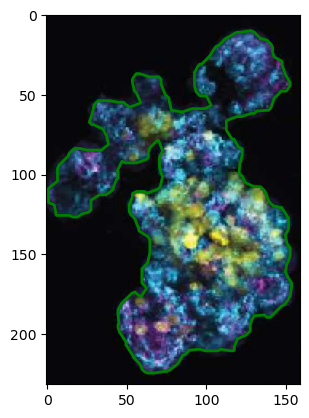

0.24513705876710293
2


<Figure size 640x480 with 0 Axes>

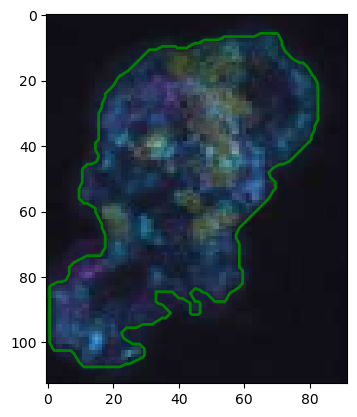

0.45533726713376266
3


<Figure size 640x480 with 0 Axes>

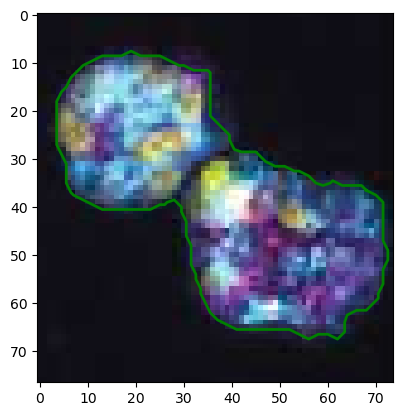

0.5583374314527654
4


<Figure size 640x480 with 0 Axes>

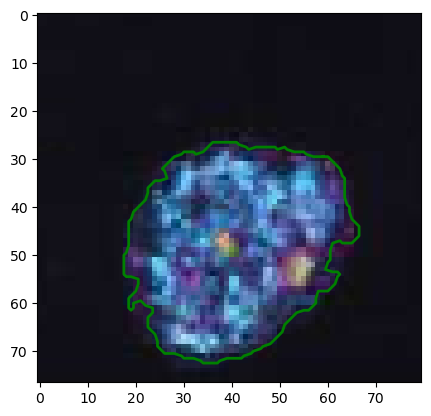

0.6781471384994902
6


<Figure size 640x480 with 0 Axes>

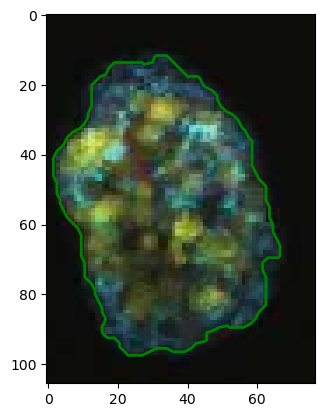

0.7627266742916142
7


<Figure size 640x480 with 0 Axes>

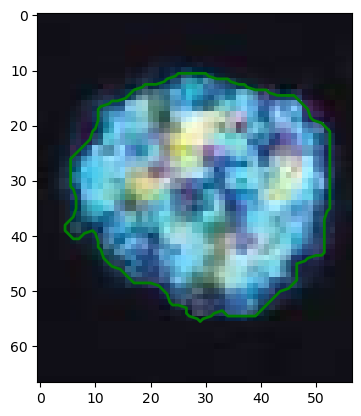

0.7901152066271085
8


<Figure size 640x480 with 0 Axes>

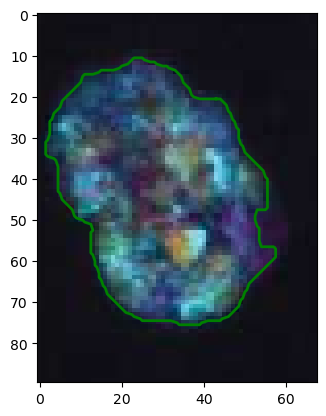

0.7639378825721042
9


<Figure size 640x480 with 0 Axes>

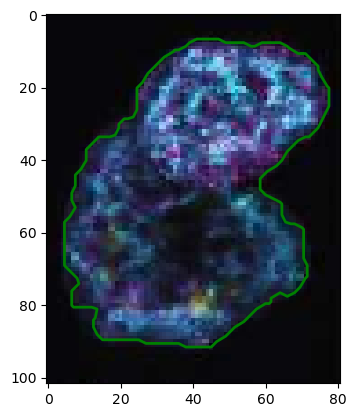

0.6634446065197493
10


<Figure size 640x480 with 0 Axes>

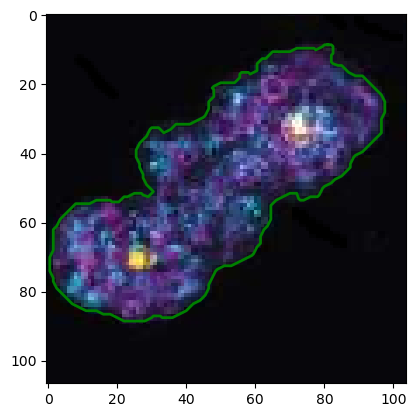

0.5234290754670788


<Figure size 640x480 with 0 Axes>

In [8]:


valid_ts = [2, 3, 4, 6, 7, 9, 10, 12]
valid_ets = [0, 2, 3, 4, 6,7, 8, 9, 10]

t_circs = np.zeros(len(valid_ts))
et_circs = np.zeros(len(valid_ets))

t_areas = np.zeros(len(valid_ts))
et_areas = np.zeros(len(valid_ets))

for n, t in enumerate(valid_ts):
    print(t)
    t_areas[n], t_circs[n] = measure_curv("t_"+str(t)+".png")
    
for n, t in enumerate(valid_ets):
    print(t)
    et_areas[n], et_circs[n] = measure_curv("et_"+str(t)+".png", thresh_coeff = (1.0 if t==2 else 0.8))
    
    


0.7894875417185993 0.7901152066271085


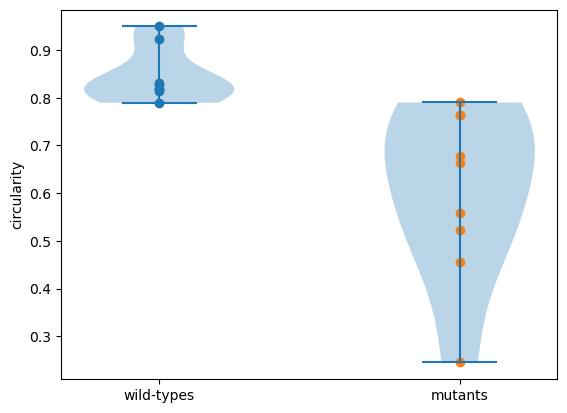

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

In [10]:
fig, ax = plt.subplots()
plt.violinplot((t_circs, et_circs))
plt.scatter([1 for t in t_circs], t_circs)
plt.scatter([2 for t in et_circs], et_circs)
print(min(t_circs), max(et_circs))
ax.set_xticks([1, 2])
ax.set_xticklabels(["wild-types", "mutants"])
plt.ylabel("circularity")


plt.show()
plt.clf()


fig.savefig("circ_comparison.eps", format='eps', dpi=400)




In [ ]:
path=r'C:/Users/44749/Documents/PhD work/simulated_organoid_datasets/c_varying'

circularity_for_cs = np.zeros((15, 10, 100))

for c in range(10, 26):
    for r in range(10):
        for n, elev in enumerate(np.arange(-90, 90, 10)):
            for m, azim in enumerate(np.arange(-90, 90, 10)): #cover all possible outlines, i.e. range over one half-surface
                filename = str(c)+"_"+str(r)+"_"+str(elev)+"_"+str(azim)+".png"
                circularity_for_cs[c-10][r][10*n + m] = measure_curv(filename, path=path)

                